# Dog breed identification
## Import data



In [1]:
# import library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

# Width, Height ...
img_width=50
img_height=50

Using TensorFlow backend.


In [2]:
# load train dataframe
data_frame = pd.read_csv('./dog-breed-identification/labels.csv')

In [3]:
# Overall description of our dataset ...
data_frame.describe()

,id,breed
count,10222,10222
unique,10222,120
top,2dff4c15cb99effe848ee5e4d977be87,scottish_deerhound
freq,1,126


In [4]:
# Print 10 first rows ...
data_frame.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [5]:
# Let's define a function that plot an image with his coresponding breed ...
def plot_images(images):
    
    images_size = images['id'].count()

    if images_size != 10 :
        print("please take data set with 10 images")
    
    else :
        fig, axes = plt.subplots(5, 2,figsize=(40,40),sharex=True)
        fig.subplots_adjust(hspace=0.3, wspace=0.3)
        
        for i, ax in enumerate(axes.flat):
            
            # Image read and resize
            img = cv2.imread('./dog-breed-identification/train/{}.jpg'.format(images.iloc[i]['id']))
            img = cv2.resize(img, (img_width, img_height))
    
    
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB).reshape(img_width,img_height,3))
            xlabel = "Breed: {0}".format(images.iloc[i]['breed'])
            ax.set_xlabel(xlabel)
            ax.xaxis.label.set_size(40)
            
        plt.show()

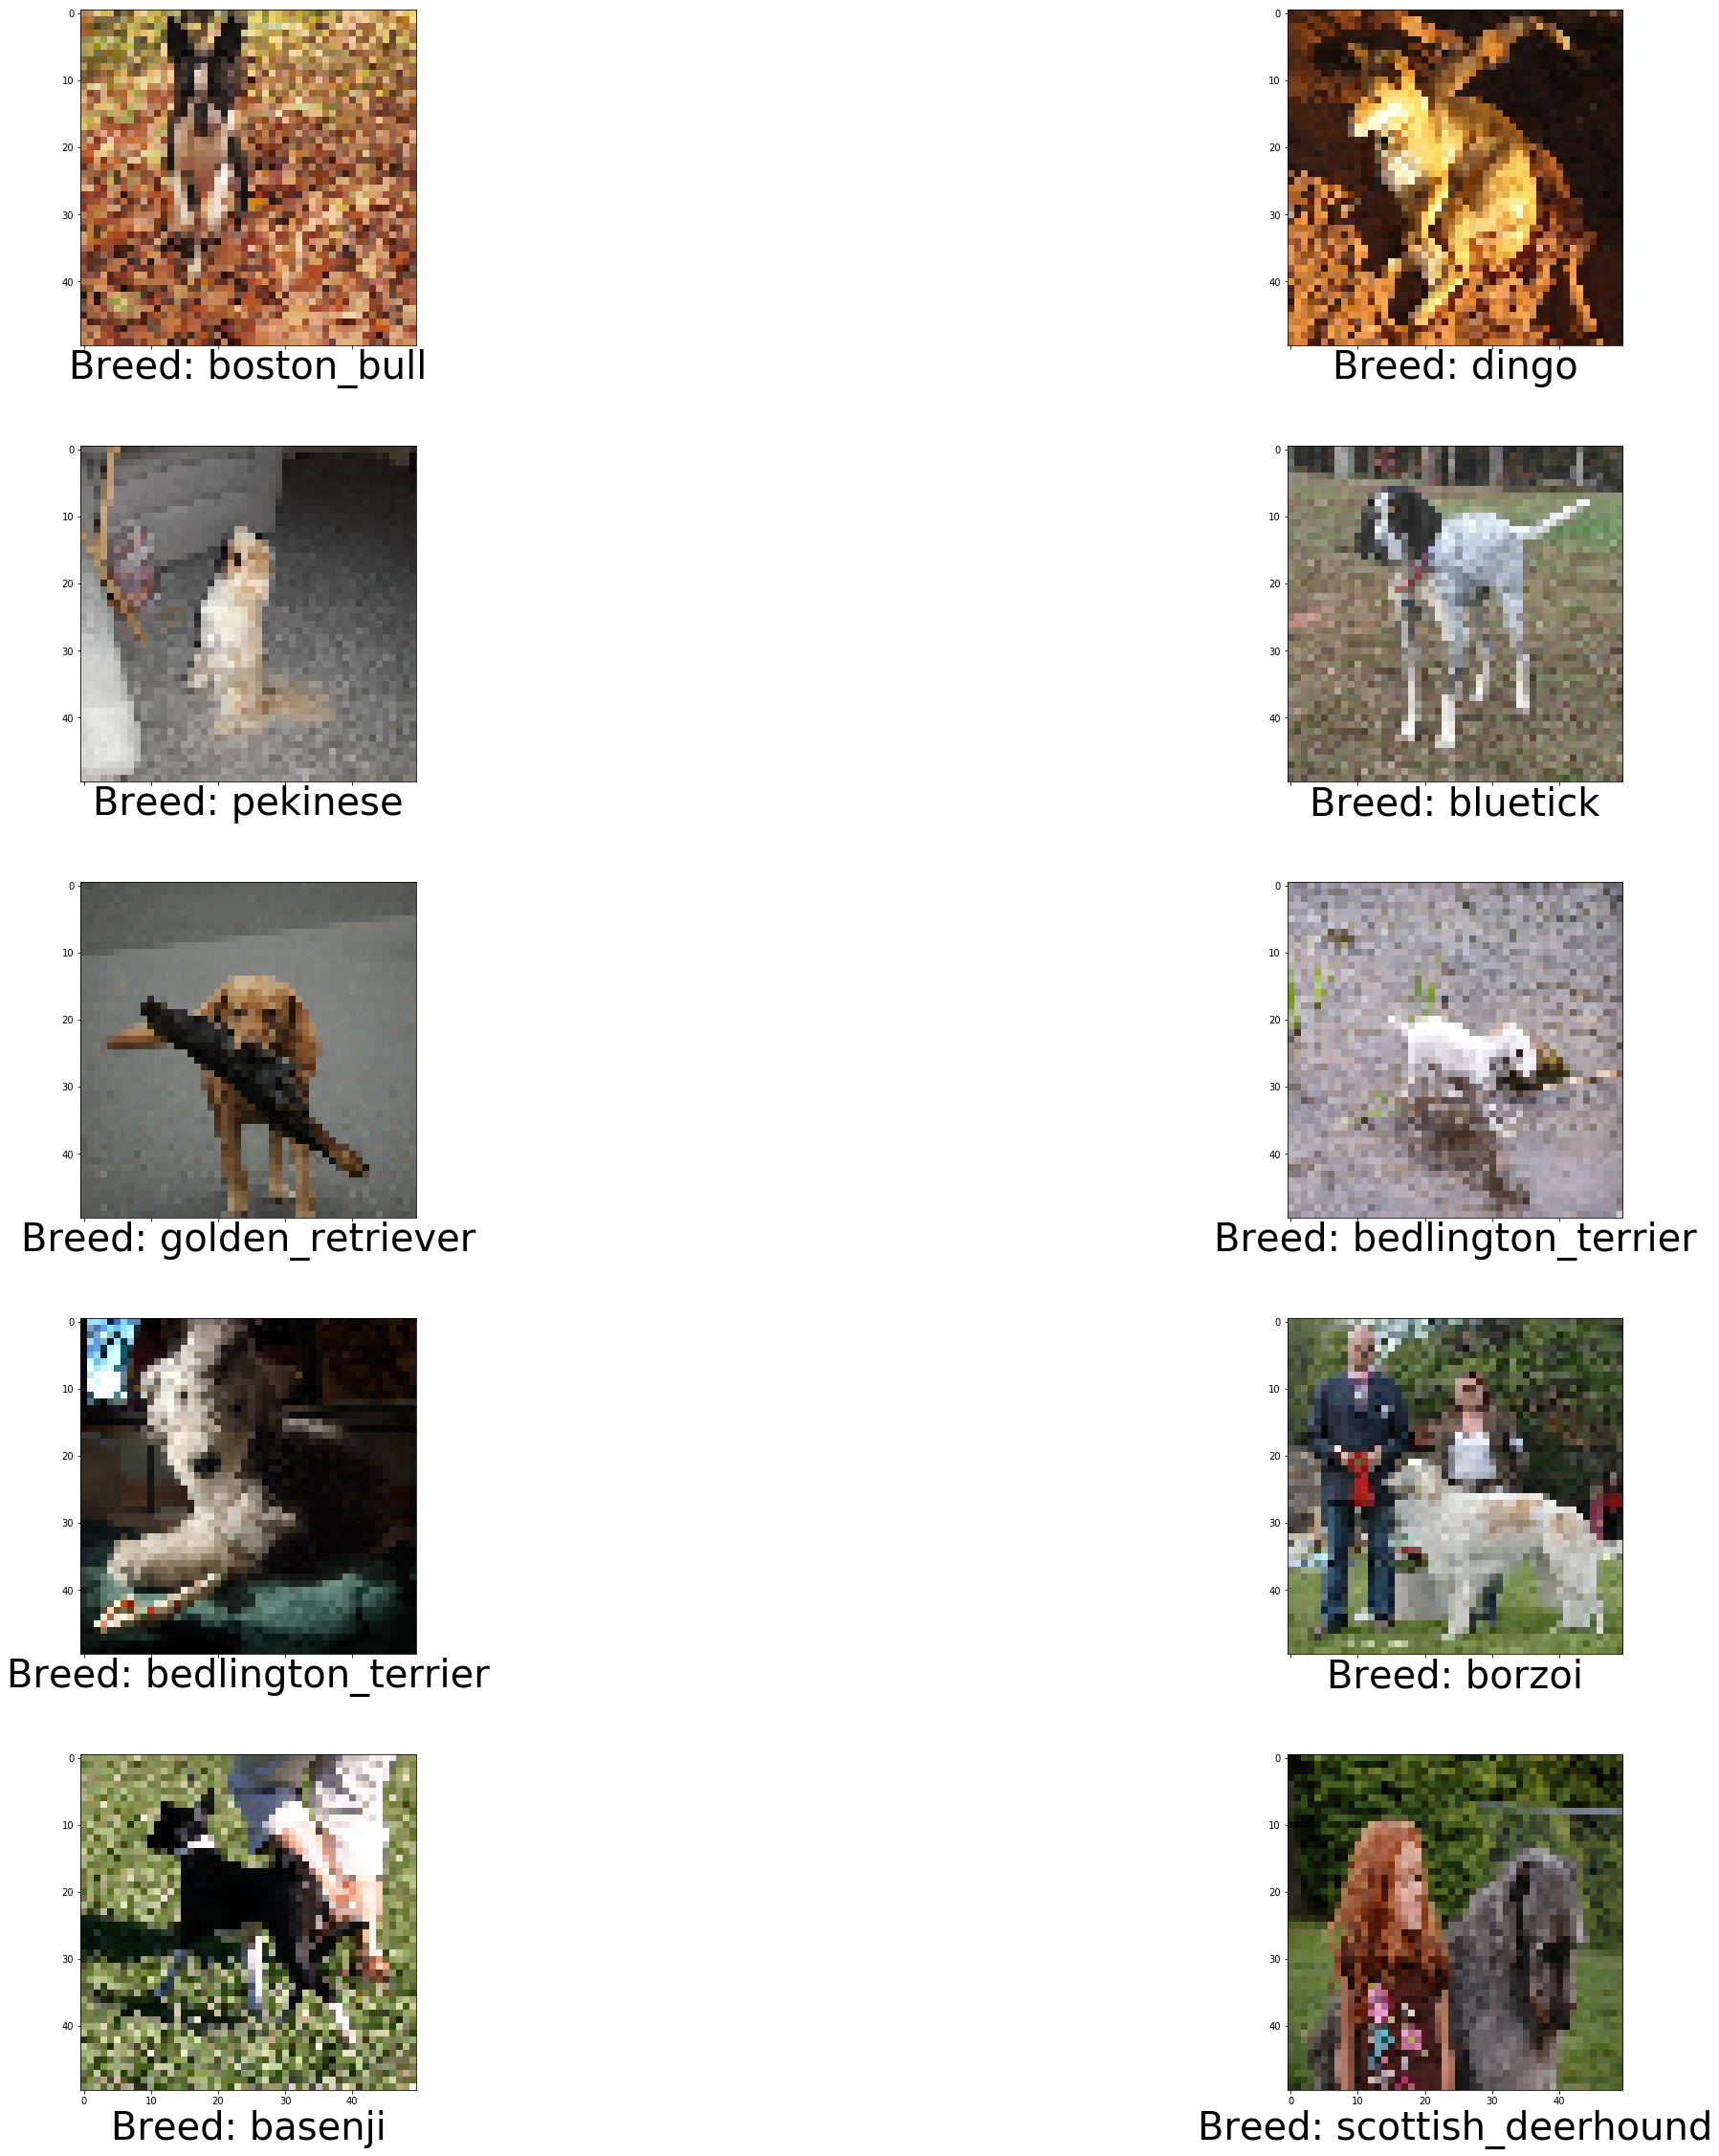

In [6]:
# Print 10 first images with the associated breed ...
data_frame_first10 = data_frame.head(10) 
plot_images(data_frame_first10)

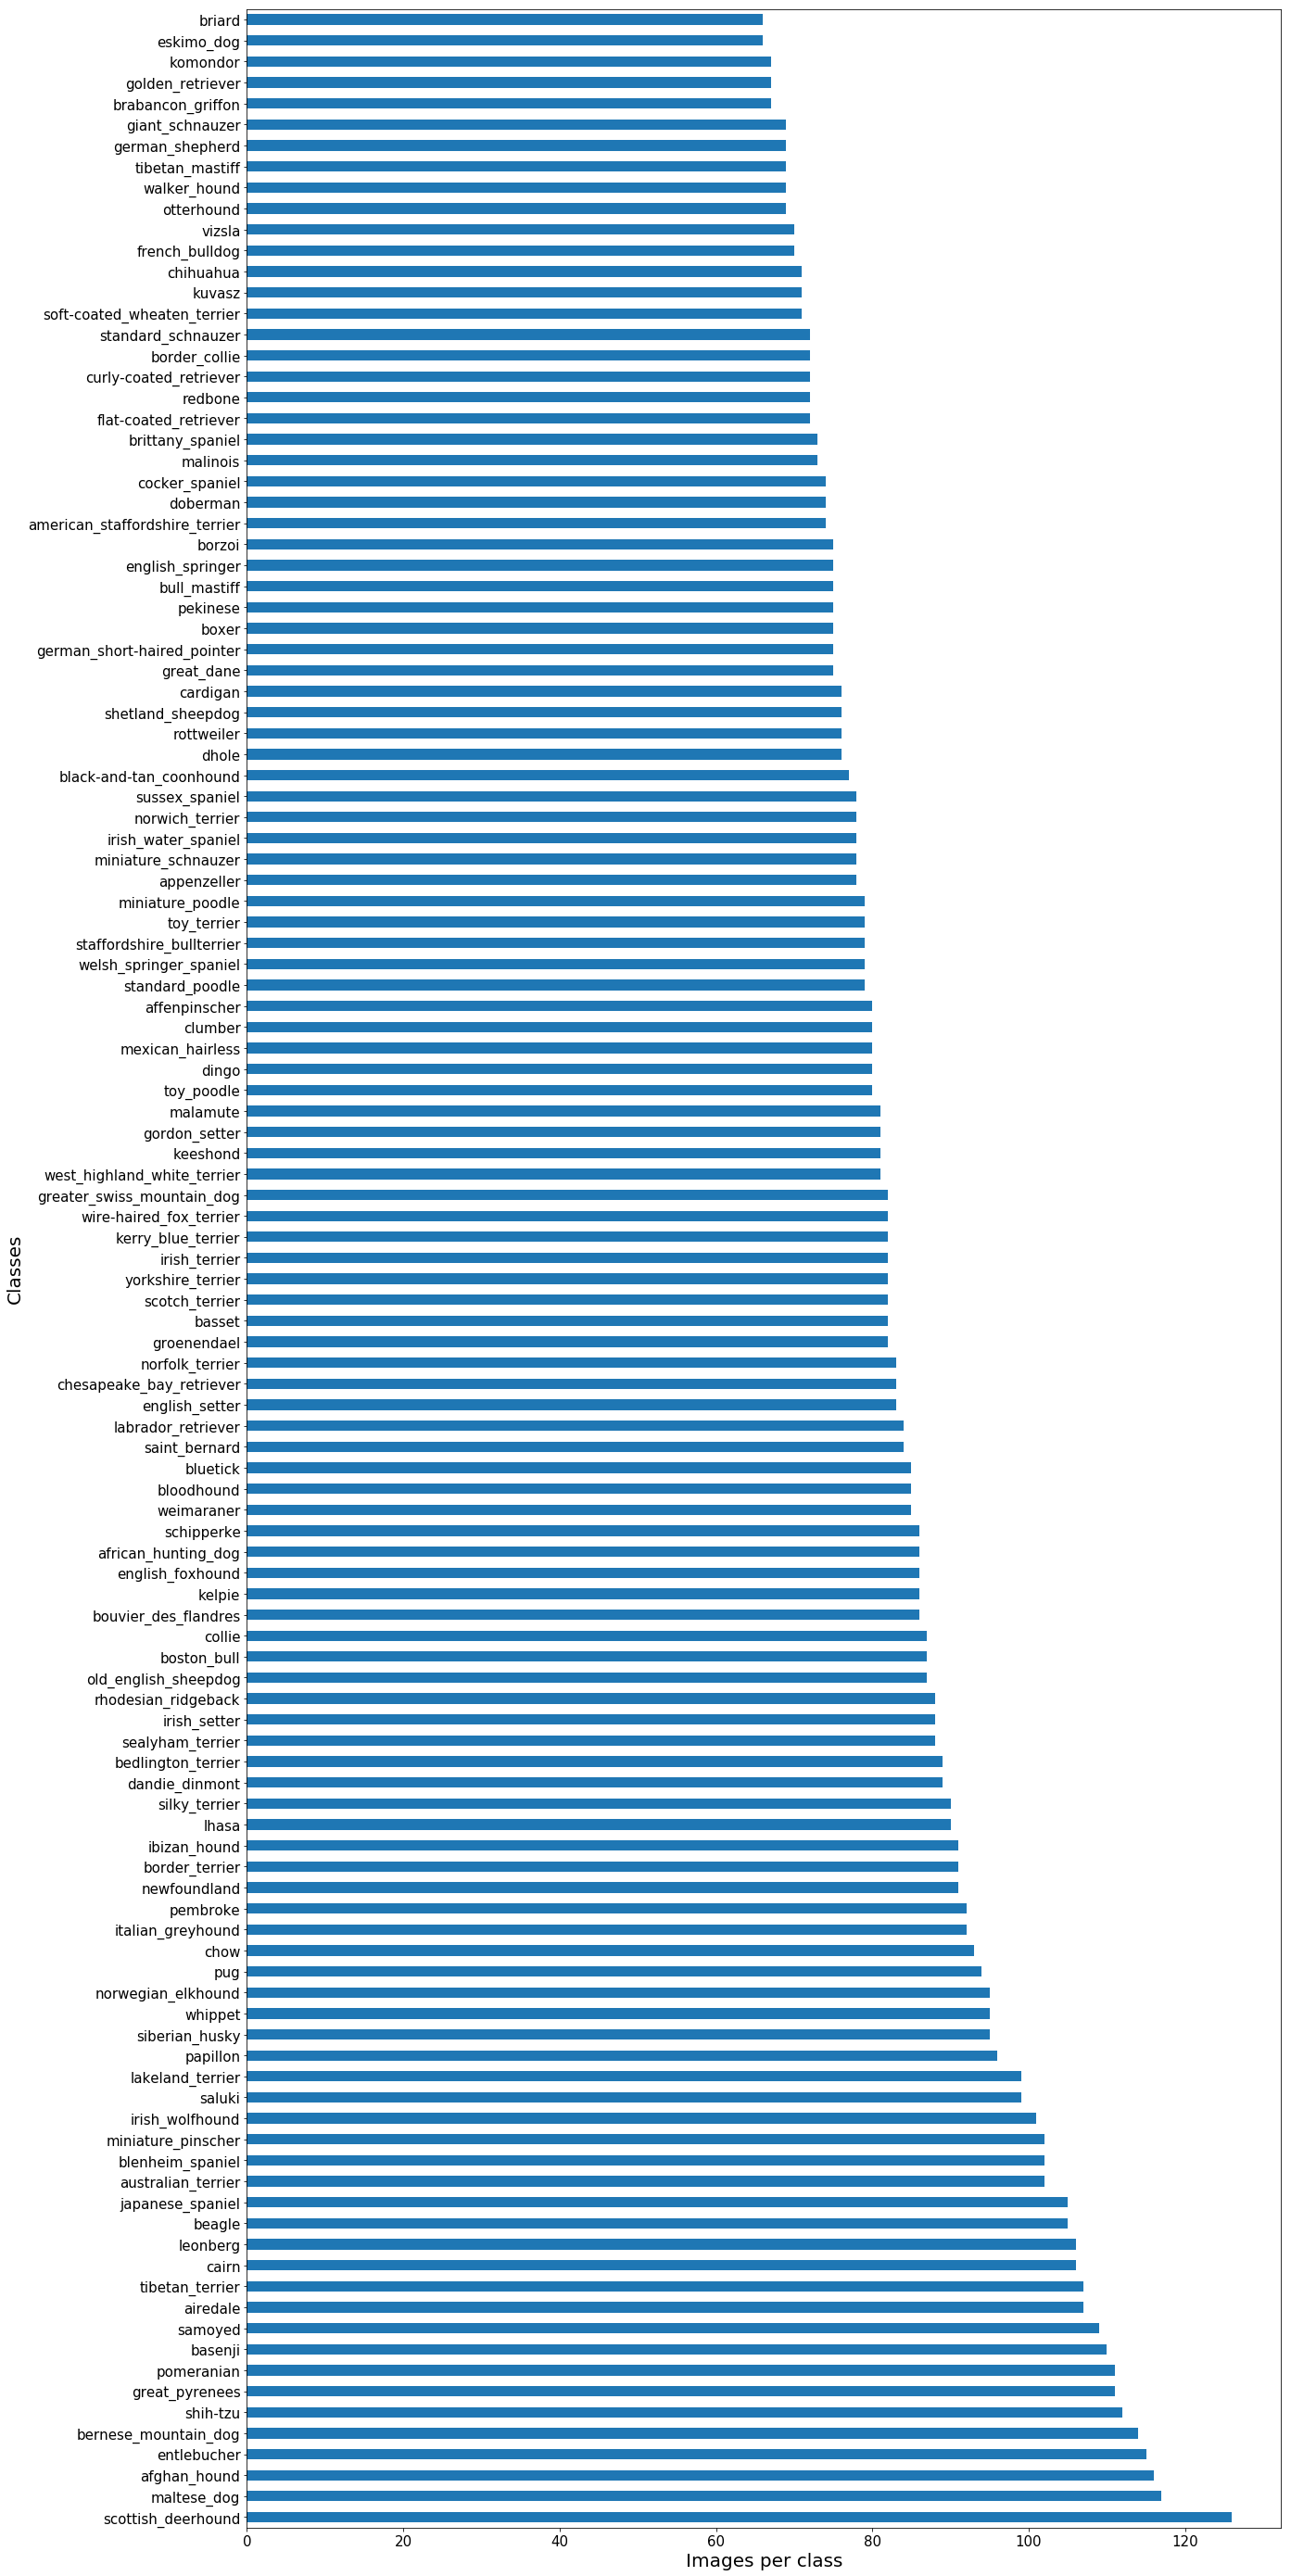

In [7]:
# Here, we show the number of image for each breed in the dataset

plot_class_distribution = data_frame['breed'].value_counts().plot(kind='barh', fontsize='15', figsize=(20, 50))
plot_class_distribution.set(xlabel="Images per class", ylabel="Classes")
plot_class_distribution.xaxis.label.set_size(20)
plot_class_distribution.yaxis.label.set_size(20)
plt.show()

## Prepare data

In [8]:
labels_df = pd.get_dummies(data_frame['breed'])
labels = labels_df.values

print(labels.shape)
labels[0]

(10222, 120)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [9]:
# Only for imges without flipped images
data = np.array([img_to_array(load_img('./dog-breed-identification/train/%s.jpg'%img, target_size=(img_width, img_height), color_mode='rgb')) for img in data_frame['id'].values.tolist()]).astype(np.int16)
print(data.shape)


# For images and flipped images
#data_original = np.array([img_to_array(load_img('./dog-breed-identification/train/%s.jpg'%img, target_size=(img_width, img_height), color_mode='rgb')) for img in data_frame['id'].values.tolist()]).astype(np.int16)
#data_flipped_lr = np.array(list(map(np.fliplr, data_original)))
#data_flipped_ud = np.array(list(map(np.flipud, data_original)))
#data_flipped_lr_ud = np.array(list(map(np.flipud, data_flipped_lr)))
#print(data_original.shape, data_flipped_lr.shape, data_flipped_ud.shape, data_flipped_lr_ud.shape)

(10222, 50, 50, 3)


(10222, 50, 50, 3) (10222, 120)


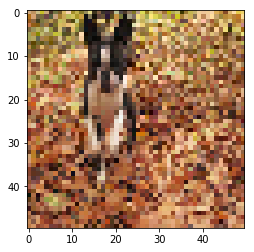

In [10]:
# Only for imges without flipped images
data = np.true_divide(data, 255, dtype=np.float64)
print(data.shape, labels.shape)
plt.imshow(data[0].reshape(img_width, img_height, 3))
plt.show()


# For images and flipped images
#data = np.concatenate((data_original, data_flipped_lr, data_flipped_ud, data_flipped_lr_ud),axis=0)
#data = np.true_divide(data, 255, dtype=np.float64)
#labels = np.concatenate((labels, labels, labels, labels), axis=0)
#print(data.shape, labels.shape)
#plt.imshow(data[0].reshape(img_width, img_height, 3))
#plt.show()
#plt.imshow(data[10222].reshape(img_width, img_height, 3))
#plt.show()
#plt.imshow(data[20444].reshape(img_width, img_height, 3))
#plt.show()
#plt.imshow(data[30666].reshape(img_width, img_height, 3))
#plt.show()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
print(x_train.shape, y_test.shape)

del data
del labels
del data_original
del data_flipped_lr
del data_flipped_ud



(7155, 50, 50, 3) (3067, 120)


NameError: name 'data_original' is not defined

## Sequential model

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), 
                 padding='same', 
                 input_shape=(img_width, img_height, 3), 
                 activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(120, activation='softmax'))
# Without learning rate
#model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])

# With learning rate
adam = optimizers.adam(lr=0.0001)                     
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])



model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)      

In [13]:
train_history = model.fit(x_train, y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(x_test, y_test))


Train on 7155 samples, validate on 3067 samples
Epoch 1/30
7155/7155 [==============================] - 118s 17ms/step - loss: 4.7842 - accuracy: 0.0081 - val_loss: 4.7783 - val_accuracy: 0.0130
Epoch 2/30
7155/7155 [==============================] - 121s 17ms/step - loss: 4.7072 - accuracy: 0.0183 - val_loss: 4.6396 - val_accuracy: 0.0264
Epoch 3/30
7155/7155 [==============================] - 121s 17ms/step - loss: 4.5137 - accuracy: 0.0370 - val_loss: 4.4504 - val_accuracy: 0.0398
Epoch 4/30
7155/7155 [==============================] - 118s 16ms/step - loss: 4.3710 - accuracy: 0.0500 - val_loss: 4.4044 - val_accuracy: 0.0424
Epoch 5/30
7155/7155 [==============================] - 117s 16ms/step - loss: 4.2477 - accuracy: 0.0616 - val_loss: 4.3838 - val_accuracy: 0.0483
Epoch 6/30
7155/7155 [==============================] - 117s 16ms/step - loss: 4.1205 - accuracy: 0.0788 - val_loss: 4.3502 - val_accuracy: 0.0541
Epoch 7/30
7155/7155 [==============================] - 120s 17ms/ste

## Training statistics

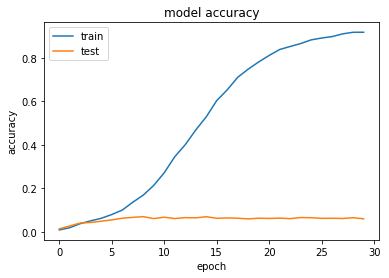

In [14]:
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

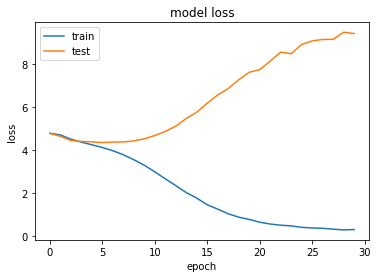

In [15]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Submit

In [16]:
sample_sub_df = pd.read_csv('./dog-breed-identification/sample_submission.csv')
sample_sub_data = np.array([img_to_array(load_img('./dog-breed-identification/test/%s.jpg'%img, target_size=(img_width, img_height), color_mode='rgb')) for img in sample_sub_df['id'].values.tolist()]).astype(np.int16)
sample_sub_data = np.true_divide(sample_sub_data, 255, dtype=np.float64)

(10357, 50, 50, 3)


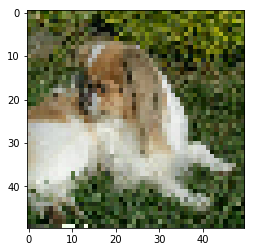

In [17]:
print(sample_sub_data.shape)
plt.imshow(sample_sub_data[0].reshape(img_width, img_height, 3))

In [18]:
predictions = model.predict(sample_sub_data, verbose=1)

10357/10357 [==============================] - 43s 4ms/step


In [19]:
submission_df = pd.DataFrame(predictions)
columns_names = labels_df.columns.values
submission_df.columns = columns_names
submission_df.insert(0, 'id', sample_sub_df['id'])

submission_df.to_csv('output.csv', index = False)

submission_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,3.060420e-13,5.040932e-07,2.471419e-08,4.730954e-03,2.955763e-06,2.115783e-05,1.890061e-07,6.718731e-06,1.857150e-08,...,4.681177e-09,5.037152e-08,1.418415e-12,5.735775e-06,1.425608e-06,5.016573e-04,5.397975e-05,8.380224e-07,3.113547e-01,3.149810e-08
1,00102ee9d8eb90812350685311fe5890,3.296029e-11,4.310658e-10,1.962038e-12,5.105647e-07,2.469860e-11,2.629624e-11,6.890952e-05,2.377148e-12,6.099420e-10,...,8.776170e-05,3.941386e-05,4.464309e-15,4.590595e-07,1.436317e-04,2.011254e-08,1.000765e-01,2.539444e-08,3.160004e-06,9.373312e-07
2,0012a730dfa437f5f3613fb75efcd4ce,2.401424e-08,4.727992e-04,1.347596e-08,3.038050e-10,5.121643e-05,2.865167e-05,1.481055e-08,3.783866e-06,3.806269e-04,...,2.513195e-06,6.804710e-01,4.018049e-11,2.911061e-05,5.958314e-06,1.720383e-04,1.478811e-04,1.338940e-06,3.025389e-02,9.530211e-07
3,001510bc8570bbeee98c8d80c8a95ec1,1.948467e-11,4.710864e-06,6.811065e-06,2.422997e-07,1.072619e-04,9.144679e-11,3.150041e-09,2.295095e-06,5.578192e-05,...,7.400695e-04,1.112527e-10,7.424103e-10,7.282142e-03,2.798892e-07,3.067259e-03,9.410641e-08,4.649926e-04,2.176002e-08,6.697238e-03
4,001a5f3114548acdefa3d4da05474c2e,5.951451e-11,9.838348e-08,2.522760e-10,2.686441e-07,6.604468e-10,1.873129e-04,2.637828e-12,2.702543e-07,2.181332e-02,...,9.570284e-06,3.737079e-04,5.175145e-13,3.644566e-06,3.733515e-06,2.567415e-06,4.118784e-09,8.698327e-11,1.750929e-09,8.743888e-11
